In [2]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [13]:
def plot_bar(quantidade, label):
    
    ind = np.arange(len(quantidade))
    width = 0.8
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, quantidade, width, color='b')
    
    ax.set_ylabel('Quantidade')
    ax.set_title('Gráfico de barras')
    ax.set_xticks(ind)
    ax.set_xticklabels(label)
    
    ax.legend()
    plt.show()

# plot_bar([5,3,4], ["x1","x2","x3"])

In [24]:
data_set = pd.read_csv('train.csv', sep=',', nrows=500000) # skiprows utilizado para pular as 3 primeiras linhas do aquivo
# data_set.plot.bar()

[13745, 77145, 10, 20, 12, 2] ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'target']


<IPython.core.display.Javascript object>


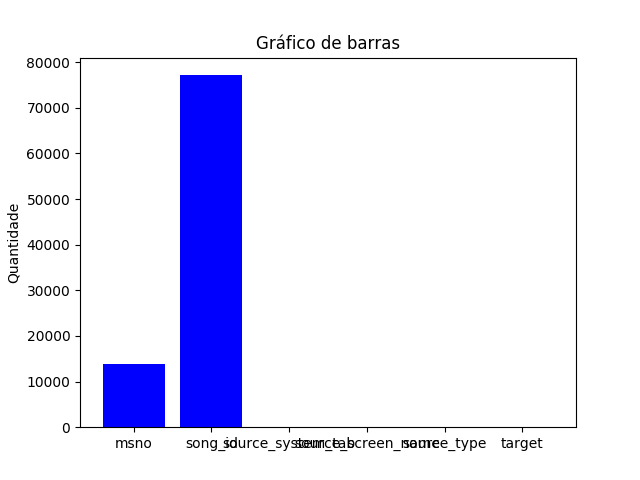

In [25]:
columns = data_set.columns.tolist()
# print (columns)
dd = data_set.reindex(columns=columns)
# dd.plot.bar(x="XA", y="BA")
# print (len(dd.msno.unique()))
# print (len(dd.song_id.unique()))
datas = []
labels = []
for column in columns:
    datas.append(len(dd[column].unique()))
    labels.append(column)
print (datas, labels)
plot_bar(datas, labels)
#     print (dd[column].unique())

In [62]:
def source_system_tab(data_frame):
    """
    recebe o data_frame da base de dados e retorna o data frame retirando as 
    linhas que tem valores nulos  na coluna source_system_tab
    """
    df = data_frame[pd.notnull(data_frame.source_system_tab)]
    df = df[~df.source_system_tab.isin(["null"])]
    return df
for i in df.source_system_tab.unique():
    print (i, len(df[df.source_system_tab.isin([i])]))

explore 755
my library 34785
search 1737
discover 9824
radio 1787
listen with 920
notification 19
settings 41


In [7]:
data_set.describe()

,target
count,26392.000000
mean,0.762731
std,0.425417
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
columns = data_set.columns.tolist()[:-1]
data_set.drop_duplicates(subset=columns, keep='first', inplace=True) 

In [ ]:
data_set.describe()